In [3]:
#Bibliotecas Mais Padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split 


# Machine Learning: Algorítimos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


#Métricas_Classificação
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


#Processamento
from sklearn.preprocessing import MinMaxScaler # Verificar com Calma
from sklearn.preprocessing import StandardScaler # Verificar com Calma


In [4]:
data1 = pd.read_csv("./base_dados\PRSA_Data_Aotizhongxin_20130301-20170228.csv",sep=',')
data2 = pd.read_csv("./base_dados\PRSA_Data_Changping_20130301-20170228.csv",sep=',')
data3 = pd.read_csv("./base_dados\PRSA_Data_Tiantan_20130301-20170228.csv",sep=',')
data4 = pd.read_csv("./base_dados\PRSA_Data_Wanshouxigong_20130301-20170228.csv",sep=',')
data5 = pd.read_csv("./base_dados\PRSA_Data_Dingling_20130301-20170228.csv",sep=',')
data6 = pd.read_csv("./base_dados\PRSA_Data_Dongsi_20130301-20170228.csv",sep=',')
data7 = pd.read_csv("./base_dados\PRSA_Data_Gucheng_20130301-20170228.csv",sep=',')
data8 = pd.read_csv("./base_dados\PRSA_Data_Huairou_20130301-20170228.csv",sep=',')
data9 = pd.read_csv("./base_dados\PRSA_Data_Guanyuan_20130301-20170228.csv",sep=',')
data10 = pd.read_csv("./base_dados\PRSA_Data_Nongzhanguan_20130301-20170228.csv",sep=',')
data11 = pd.read_csv("./base_dados\PRSA_Data_Shunyi_20130301-20170228.csv",sep=',')
data12 = pd.read_csv("./base_dados\PRSA_Data_Wanliu_20130301-20170228.csv",sep=',')


In [5]:
data1.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


# Verificando Datasets menos defasados

In [6]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
num_=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(len(k)):
  print("Data {} - Estação: {} - Dados Faltantes:".format(num_[i],k[i].station[0]),(k[i].isnull().sum().sum()))
#2, 7, 8, 10


Data 1 - Estação: Aotizhongxin - Dados Faltantes: 7271
Data 2 - Estação: Changping - Dados Faltantes: 5166
Data 3 - Estação: Tiantan - Dados Faltantes: 5277
Data 4 - Estação: Dingling - Dados Faltantes: 7015
Data 5 - Estação: Dongsi - Dados Faltantes: 7600
Data 6 - Estação: Huairou - Dados Faltantes: 7485
Data 7 - Estação: Wanshouxigong - Dados Faltantes: 5146
Data 8 - Estação: Gucheng - Dados Faltantes: 4728
Data 9 - Estação: Guanyuan - Dados Faltantes: 5279
Data 10 - Estação: Nongzhanguan - Dados Faltantes: 4090
Data 11 - Estação: Shunyi - Dados Faltantes: 8523
Data 12 - Estação: Wanliu - Dados Faltantes: 6447


#Escolhendo os Data Frames menos defasados


In [7]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
# data_colunas = ('PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM')
num_=[2,7,8,10]

for i in range(len(k)):
  k[i].fillna(value=k[i].mean(), inplace= True)

for i in range(len(k)):
   k[i].dropna(inplace=True)


# for i in range(len(k)):
#   print("Data {}\n".format(num_[i]),k[i].isnull().sum())


#Concatenando os datasets

In [8]:
# data_ = pd.concat([data3,data5,data8,data6],ignore_index=True)
data_ = pd.concat([data2,data7,data8,data10],ignore_index=True)
# data_ = pd.concat([data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12],ignore_index=True)

#Matriz de Correlação

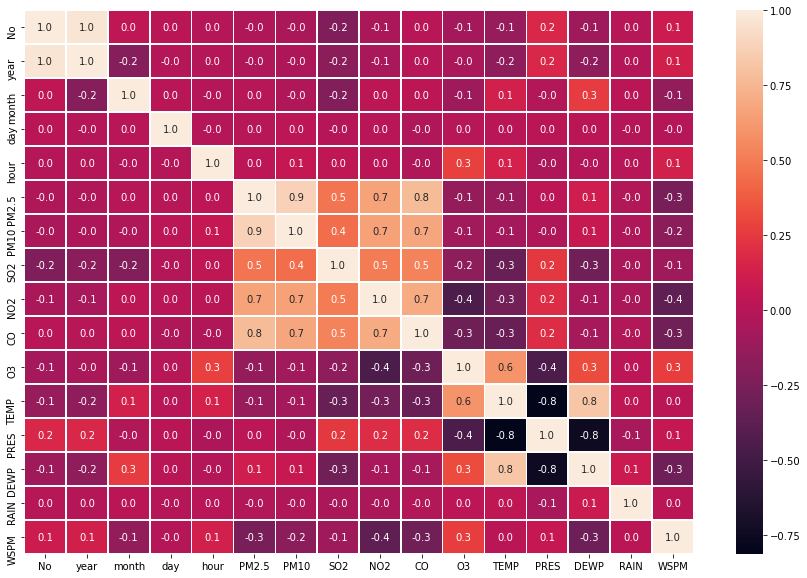

In [9]:
# análise de correlação
correlation = data_.corr(method='pearson')

# plot da matriz de correlação
plt.figure(figsize=[15,10])
ax = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [10]:
# print(data_.head())
data_.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,139577.0,17492.762375,10117.477605,1.0000,8729.0,17485.0,26257.000000,35064.0
year,139577.0,2014.657888,1.176495,2013.0000,2014.0,2015.0,2016.000000,2017.0
month,139577.0,6.524986,3.445526,1.0000,4.0,7.0,10.000000,12.0
day,139577.0,15.719997,8.803012,1.0000,8.0,16.0,23.000000,31.0
hour,139577.0,11.507319,6.918404,0.0000,6.0,12.0,17.000000,23.0
PM2.5,139577.0,77.271392,77.908939,2.0000,20.0,54.0,106.000000,882.0
PM10,139577.0,103.448947,89.904361,2.0000,36.0,83.0,143.000000,999.0
SO2,139577.0,15.302150,21.391419,0.2856,2.0,7.0,18.689242,500.0
NO2,139577.0,47.652956,33.686218,1.0265,22.0,40.0,67.000000,276.0
CO,139577.0,1204.343520,1106.452394,100.0000,500.0,900.0,1400.000000,10000.0


## Dropando as valores Nulos, que não foram substituidos

In [11]:
# data_.dropna(inplace= True)


# Definindo funções
*   Limetes
  * Superior
  * Inferior
*   Excluir Outliers
*   Plotando Boxplot
*   Plotando Histograma



In [12]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5* amplitude, q3 + 1.5*amplitude
def excluir_outliers(df, nome_coluna):
  qtd_linhas = df.shape[0]
  lim_inf, lim_sup= limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_removidas = qtd_linhas - df.shape[0]
  return df, linhas_removidas

In [13]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x= coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.histplot(coluna, kde=True)


def grafico_barra(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x=coluna.values_counts().index, y=coluna.values_counts())
  ax.set_xlim(limites(coluna))

#Plotando Graficos

In [14]:
# data_colunas = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
# for j in data_colunas:
#   plt.title(data3.iloc[0,-1])
#   diagrama_caixa(data3[j])
#   histograma(data3[j])

In [15]:
# for j in data_colunas:
#   plt.title(data5.iloc[0,-1])
#   diagrama_caixa(data5[j])
#   histograma(data5[j])

In [16]:
# for j in data_colunas:
#   plt.title(data8.iloc[0,-1])
#   diagrama_caixa(data8[j])
#   histograma(data8[j])

In [17]:
# for j in data_colunas:
#   plt.title(data6.iloc[0,-1])
#   diagrama_caixa(data6[j])
#   histograma(data6[j])

# Modelo de Previsão
*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM
*   RNA
*   KNN

In [18]:
modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_dt = DecisionTreeClassifier()
modelo_svm = SVC()
modelo_knn = KNeighborsClassifier()
modelo_ada = AdaBoostClassifier()

modelos = { 
            'Random Forest' : modelo_rf,
            'Logistic Regression': modelo_lr,
            'Decision Tree': modelo_dt,
            'SVM': modelo_svm,
            # 'RNA' :     ,
            'KNN': modelo_knn,
            'AdaBoost': modelo_ada
           }

y = data_['station']
X = data_.drop(columns=['station','wd','year','month','hour','No','day','PM2.5'], axis=1)

# No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'


#Metricas de Avaliação


In [19]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
  accuracy = accuracy_score(y_teste, previsao)
  f1 = f1_score(y_teste, previsao,average='weighted')
  recall = recall_score(y_teste, previsao,average='weighted')
  precision = precision_score(y_teste, previsao,average='weighted')

  return f'modelo:{nome_modelo} \n Accuracy:{accuracy:}% \n F1:{f1:}% \n Recall:{recall:}% \n Precision:{precision:}% \n '

# Divisão Base em Treino

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size=0.30)

X_train_standardScaler = StandardScaler().fit_transform(X_train)

for nome_modelo, modelo in modelos.items():
  #treino
  y_train_pred = cross_val_predict(modelo, X_train_standardScaler, y_train, cv=5)
  modelo.fit(X_train_standardScaler, y_train_pred)

In [ ]:
# X_train_standardScaler

array([[-0.08589258, -0.57603215, -0.58476132, ..., -1.15422801,
        -0.07710355,  2.5022632 ],
       [ 0.78155731, -0.48327963, -0.11142119, ...,  1.44184595,
        -0.07710355,  0.41889764],
       [-0.65307135, -0.6224084 , -0.91018266, ...,  0.99474432,
        -0.07710355, -0.62278514],
       ...,
       [-0.14149834, -0.6224084 , -0.17058871, ...,  0.02121659,
        -0.07710355, -1.1035618 ],
       [-0.89773671, -0.52965589, -0.28892374, ..., -1.41383541,
        -0.07710355, -0.22213792],
       [-0.81988864, -0.52965589, -1.14685272, ...,  0.53322006,
        -0.07710355, -0.30226736]])

# Teste e Verificação de Resultados

In [22]:
for nome_modelo, modelo in modelos.items():
  #testar
  X_test_standardScaler = StandardScaler().fit_transform(X_test)
  previsao = modelo.predict(X_test_standardScaler)
  #confusion_matrix(y_train, y_train_pred)
  print(avaliar_modelo(nome_modelo, y_test, previsao))

modelo:Random Forest 
 Accuracy:0.6058890958590056% 
 F1:0.6053750396236386% 
 Recall:0.6058890958590056% 
 Precision:0.6052335688470614% 
 
modelo:Logistic Regression 
 Accuracy:0.4724411329225773% 
 F1:0.46125602059165766% 
 Recall:0.4724411329225773% 
 Precision:0.4611637670856206% 
 
modelo:Decision Tree 
 Accuracy:0.44784353059177534% 
 F1:0.4482369889650817% 
 Recall:0.44784353059177534% 
 Precision:0.4486840679774769% 
 
modelo:SVM 
 Accuracy:0.5531833596026173% 
 F1:0.550494495411795% 
 Recall:0.5531833596026173% 
 Precision:0.5497760292209317% 
 
modelo:KNN 
 Accuracy:0.5328127238859436% 
 F1:0.5370599992066503% 
 Recall:0.5328127238859436% 
 Precision:0.570787303670645% 
 
modelo:AdaBoost 
 Accuracy:0.4675216124564169% 
 F1:0.46847545925306483% 
 Recall:0.4675216124564169% 
 Precision:0.4748749639498023% 
 


# Aplicação de GridSeachCV

## Arvore de Decisão

In [23]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'splitter': ['best','random'],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [24]:
# #'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(X,y)
melhores_parametros = grid_search.best_params_
melhor_resultado= grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}
0.44323929004074214


# Random Forest

In [25]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'n_estimators': [10,40,100,150],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [26]:
# # {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
grid_search.fit(X,y)
melhores_parametros = grid_search.best_params_
melhor_resultado= grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
0.5276371285243361


# KNN


In [27]:
parametros = {
    'n_neighbors': [3,5,10,20],
    'p': [1,2]
}

In [28]:
# #{'n_neighbors': 20, 'p': 1}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(X,y)
melhores_parametros = grid_search.best_params_
melhor_resultado= grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.4405741420161305


# Regressão Logistica

In [29]:
parametros = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,1.5,2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [30]:
# {'n_neighbors': 20, 'p': 1}
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=parametros)
grid_search.fit(X,y)
melhores_parametros = grid_search.best_params_
melhor_resultado= grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 20, 'p': 1}
0.4405741420161305


# SVM

In [31]:
parametros = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,1.5,2.0],
  }

In [32]:
# from sklearn.svm import SVC
grid_search = GridSearchCV(estimator = SVC(), param_grid=parametros)
grid_search.fit(X,y)
melhores_parametros = grid_search.best_params_
melhor_resultado= grid_search.best_score_

print(melhores_parametros)
print(melhor_resultado)

# Resultados Encontrados:
  ### > Variaveis Retiradas: ['station','wd'] <br>

- Random Forest <br>
          Accuracy:74.80% 
          F1:74.80% 
          Recall:74.80% 
          Precision:74.80% 
---
- Logistic Regression <br>
          Accuracy:35.36%
          F1:35.36%
          Recall:35.36%
          Precision:35.36%
---
- Decision Tree
          Accuracy:59.79%
          F1:59.79%
          Recall:59.79%
          Precision:59.79%
---
- KNN
          Accuracy:49.71%
          F1:49.71%
          Recall:49.71%
          Precision:49.71%

In [ ]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)

importancia_features

plt.figure(figsize=(15,5))
ax= sns.barplot(x=importancia_features.index, y=importancia_features[0])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo_rf)
cm.fit(X_train,y_train)
cm.score(X_test, y_test)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo_rf)
cm.fit(X_train,y_train)
cm.score(X_test, y_test)

In [ ]:
data1.columns

In [ ]:
data_

In [ ]:
datas_teste = [data2,data7,data8,data10]
#[2,7,8,10]

list_indice = []
list_station = []
list_vol = []
for i in range(len(datas_teste)):
    list_indice.append(i+1)
    list_station.append(datas_teste[i]['station'][i])
    list_vol.append(round(datas_teste[i]['NO2'].std(),2))
    NO2 = pd.DataFrame({'Station': list_station, 'Qtd': list_vol})
    
list_indice = []
list_station = []
list_vol = []
for i in range(len(datas_teste)):
    list_indice.append(i+1)
    list_station.append(datas_teste[i]['station'][i])
    list_vol.append(round(datas_teste[i]['PRES'].std(),2))
    PRES = pd.DataFrame({'Station': list_station, 'Qtd': list_vol})
list_indice = []
list_station = []
list_vol = []
for i in range(len(datas_teste)):
    list_indice.append(i+1)
    list_station.append(datas_teste[i]['station'][i])
    list_vol.append(round(datas_teste[i]['DEWP'].std(),2))
    DEWP = pd.DataFrame({'Station': list_station, 'Qtd': list_vol})
list_indice = []
list_station = []
list_vol = []
for i in range(len(datas_teste)):
    list_indice.append(i+1)
    list_station.append(datas_teste[i]['station'][i])
    list_vol.append(round(datas_teste[i]['TEMP'].std(),2))
    TEMP = pd.DataFrame({'Station': list_station, 'Qtd': list_vol})
list_indice = []
list_station = []
list_vol = []
for i in range(len(datas_teste)):
    list_indice.append(i+1)
    list_station.append(datas_teste[i]['station'][i])
    list_vol.append(round(datas_teste[i]['O3'].std(),2))
    O3 = pd.DataFrame({'Station': list_station, 'Qtd': list_vol})
#Colocados como escolhidos: 3,5,6,8

In [ ]:
# 'NO2','PRES','DEWP','TEMP','O3'
print("NO2")
NO2.sort_values('Qtd')

In [ ]:
print("PRES")
PRES.sort_values('Qtd')

In [ ]:
print("DEWP")
DEWP.sort_values('Qtd')

In [ ]:
print("TEMP")
TEMP.sort_values('Qtd')

In [ ]:
print("O3")
O3.sort_values('Qtd')